# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, json
import time
from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1434

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
#create a dataframe which will eventually hold all of the required raw data
raw_data = pd.DataFrame(columns =("City","Latitude","Longitude","Max Temp","Wind Speed","Cloudiness","Description", "Humidity"))

In [69]:
# Enter your API key here
api_key = "b9eda530467618ee7b488b14c39de25c"
  
# base_url variable to store url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#loop
for city_name in cities:
  
    # complete_url variable to store
    # complete url address
    complete_url = base_url + "appid=" + api_key + "&q=" + city_name
  
    # get method of requests module
    # return response object
    response = requests.get(complete_url)
  
    # json method of response object 
    # convert json format data into
    # python format data
    x = response.json()
  
    # Now x contains list of nested dictionaries
    # Check the value of "cod" key is equal to
    # "404", means city is found otherwise,
    # city is not found
    if x["cod"] != "404":
  
        # store the value of "main"
        # key in variable y
        y = x["main"]
        y1 = x["wind"]
        y2 = x["clouds"]
        y3 = x["coord"]
  
        # store the value corresponding
        # to the "temp" key of y
        current_temperature = y["temp_max"]
  
        # store the value corresponding
        # to the "clouds" key of y
        current_clouds = y2["all"]
      
        # store the value corresponding
        # to the "humidity" key of y
        current_humidity = y["humidity"]
    
         # store the value corresponding
        # to the "wind" key of y
        current_wind = y1["speed"]
  
        # store the value of "weather"
        # key in variable z
        z = x["weather"]
        
        lat = y3["lat"]
        long = y3["lon"]
  
        # store the value corresponding 
        # to the "description" key at 
        # the 0th index of z
        weather_description = z[0]["description"]
  
        # print following values
        print(current_temperature, current_clouds, current_humidity, current_wind, weather_description, city_name, lat, long) 
        
        # create a dictionary 'tuple' containing the information that we want to put into the dataframe.
        # The advantage of using a dictionary here is that it is a nice, readable way to assocate the columns
        # in our dataframe with the variables that we have extracted from the json weather data THAT DOES NOT
        # DEPEND ON HOW WE ORDER THE DATA.
        row_to_add = {'City':city_name,'Latitude':lat,'Longitude':long,'Max Temp':current_temperature,'Cloudiness':current_clouds,'Wind Speed':current_wind,'Description':weather_description,'Humidity':current_humidity}
        
        # add this new row of data to the dataframe ... N.B.  the append() method of the DataFrame class is
        # immutable.  That is, calling this method does not, by itself, actually modify the dataframe.  Rather, it
        # RETURNS an object which is the modified dataframe.  So, we have to call the append() method, and then 
        # basically overwrite the original dataframe with this new modified dataframe.
        raw_data = raw_data.append(row_to_add, ignore_index = True)
   
        
    else:
        print(" City Not Found ")

287.04 17 100 1.03 fog hobart -42.8794 147.3294
279.15 75 87 3.6 broken clouds punta arenas -53.15 -70.9167
266.15 20 68 5.14 few clouds longyearbyen 78.2186 15.6401
279.15 0 49 2.06 clear sky sorland 67.667 12.6934
296.63 99 86 0.52 overcast clouds lisala 2.15 21.5167
294.37 60 49 7.3 broken clouds semnan 35.5729 53.3971
288.87 90 59 2.89 overcast clouds lebu -37.6167 -73.65
268.15 90 100 3.09 mist tuktoyaktuk 69.4541 -133.0374
297.94 55 72 4.65 broken clouds rikitea -23.1203 -134.9692
297.15 90 78 4.63 light rain saint-philippe -21.3585 55.7679
297.43 4 86 3.37 clear sky isangel -19.55 169.2667
296.27 88 53 1.15 overcast clouds menongue -14.6585 17.691
278.2 53 60 5.64 broken clouds sosva 59.1766 61.8558
286.48 20 35 4.63 few clouds saint anthony 45.0205 -93.218
280.93 22 96 0.89 few clouds mataura -46.1927 168.8643
 City Not Found 
279.82 75 87 4 light rain nikolskoye 59.7035 30.7861
 City Not Found 
290.15 25 77 2.06 scattered clouds katherine -14.4667 132.2667
287.59 26 35 0.89 sc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# the info() method is really very useful, in particular because it will tell us the data TYPE of each
# column in the dataframe.

# Notice, for example, that Cloudiness and Humidity are actually string objects, whereas we expected them
# to be numerical percentages.  So, we are going to have to deal with that!
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         1327 non-null   object 
 1   Latitude     1327 non-null   float64
 2   Max Temp     1327 non-null   float64
 3   Wind Speed   1327 non-null   float64
 4   Cloudiness   1327 non-null   object 
 5   Description  1327 non-null   object 
 6   Humidity     1327 non-null   object 
dtypes: float64(3), object(4)
memory usage: 72.7+ KB


In [85]:
# convert the Cloudiness and Humidity colums from strings into numerical values (floating point numbers).
raw_data['Cloudiness'] = raw_data['Cloudiness'].astype(float)
raw_data['Humidity'] = raw_data['Humidity'].astype(float)

# print the dataframe, just to check that everything looks good!
raw_data

,City,Latitude,Longitude,Max Temp,Wind Speed,Cloudiness,Description,Humidity
0,hobart,-42.8794,147.3294,287.04,1.03,17.0,fog,100.0
1,punta arenas,-53.1500,-70.9167,279.15,3.60,75.0,broken clouds,87.0
2,longyearbyen,78.2186,15.6401,266.15,5.14,20.0,few clouds,68.0
3,sorland,67.6670,12.6934,279.15,2.06,0.0,clear sky,49.0
4,lisala,2.1500,21.5167,296.63,0.52,99.0,overcast clouds,86.0
...,...,...,...,...,...,...,...,...
1316,labrea,-7.2586,-64.7981,304.01,1.67,31.0,scattered clouds,59.0
1317,orlik,52.5178,99.8250,272.87,1.55,22.0,few clouds,91.0
1318,abnub,27.2696,31.1511,312.15,7.72,0.0,clear sky,17.0
1319,saint johnsbury,44.4192,-72.0151,284.15,5.53,100.0,overcast clouds,50.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
# create a new sub-dataframe that contains only the rows where Humidity>100%
clean_city_high_humidity = raw_data[raw_data['Humidity'] > 100.0]

# check how many rows there are with this condition.
len(clean_city_high_humidity)

0

In [87]:
#  Get the indices of cities that have humidity over 100%.
# 
#  This step seems unnecessary, even if there is high humidity data, as we can remove those
#  entries in a much simpler way

In [88]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#
# The above comments in this cell were the professor's comments.  It is way easier to just parse the dataframe
# in the following way, rather than complicating matters by worrying about specific indices.
clean_city_data = raw_data[raw_data['Humidity'] <= 100.0]

In [89]:
# Export the clean city data here:
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

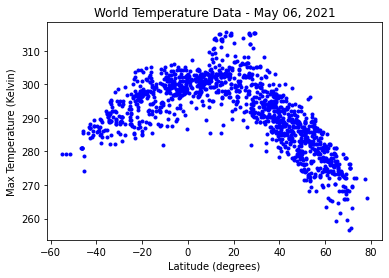

In [90]:
# import that data library, and then get today's date: the format will be 'Month XX, YYYY' 
from datetime import date
today = date.today().strftime("%B %d, %Y")

# Make a plot of Max Temp vs. Latitude
#
# <rant>
# Please note:  the accepted way of specifying any x-y plot is to day "y vs. x" (and not x vs. y as your
# professor has done above).  This is a huge pet peeve of mine!!!!!!!!!!!!!  We are trying to see if the temperature
# (i.e the dependent variable) depends on the latitude (i.e. the independent variable).  That is, we are trying
# to answer the question: 'Does Temperature depend on Latitude?'  Thus, we clearly want temperature on the y-axis
# and latitude on the x-axis.
#
# For the plot() method in matplotlib.pyplot, the x-data goes FIRST in the call, and then the y-data goes
# SECOND.  I think that this is probably where this new WRONG way of calling this 'X vs. Y' comes from, and it
# bothers me to no end, and it is just wrong.
# </rant>
#
plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % today)
plt.savefig('World_Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

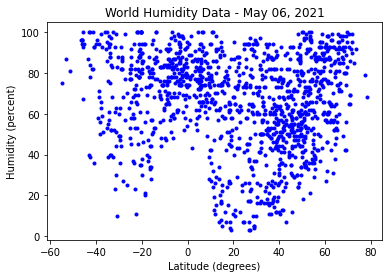

In [91]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Humidity'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Humidity (percent)')
plt.title('World Humidity Data - %s' % today)
plt.savefig('World_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

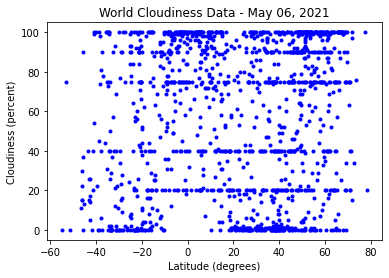

In [92]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Cloudiness'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloudiness (percent)')
plt.title('World Cloudiness Data - %s' % today)
plt.savefig('World_Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

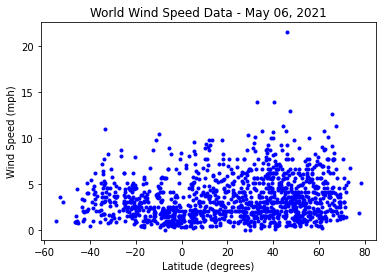

In [93]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Wind Speed'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title('World Wind Speed Data - %s' % today)
plt.savefig('World_WindSpeed.png')
plt.show()

## Linear Regression

In [94]:
# The first thing that we want to do here is to create a function which will handle the linear regression 
# and plotting for us.  This will reduce a lot of duplicate coding!
# 
# When we call this function, we are going to pass to it:
#
# 1. the x-data
# 2. the y-data
# 3. the label for the x-axis
# 4. the label for the y-axis
# 5. the title of the plot
#

def linear_plot(x,y,xstring,ystring,thistitle):
    
    # do the linear regression ... all we need to do is to call the lingress() method that we imported above
    res = linregress(x, y)
    slope = res.slope
    intercept = res.intercept
    
    # get today's date
    from datetime import date
    today = date.today().strftime("%B %d, %Y")

    # create the plot
    #
    # first, plot the actual data
    plt.plot(x,y,'b.',label='Data')    
    # next, plot the linear regression fit.
    plt.plot(x, intercept + slope*x, 'r-', label='Linear Fit')
    # finally, add the axis labels, title, and legend
    plt.xlabel(xstring)
    plt.ylabel(ystring)
    plt.title(thistitle % today)
    plt.legend()
    plt.show()
    
    
    # With any linear regression plot, there are typically two things that we can use to decide
    # whether or not the y-variable actually does depend on the x-variable:
    # 
    # 1. The slope of the linear regression, WITH AN ASSOCIATED UNCERTAINTY.
    # 2. The R^2 value (i.e. the correlation coefficient)
    # 
    # The following is some pretty standard code that uses the Student's t-distribution
    # together with summary statistics from the linear regression in order to extract these two quantities.
    #
    from scipy.stats import t
    tinv = lambda p, dof: abs(t.ppf(p/2, dof))
    ts = tinv(0.05, len(x)-2)
    print(f"R-squared: {res.rvalue**2:.6f}")
    print(f"slope (95%): {res.slope:.6f} +/- {ts*res.stderr:.6f}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 2 to 1320
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         942 non-null    object 
 1   Latitude     942 non-null    float64
 2   Longitude    942 non-null    float64
 3   Max Temp     942 non-null    float64
 4   Wind Speed   942 non-null    float64
 5   Cloudiness   942 non-null    float64
 6   Description  942 non-null    object 
 7   Humidity     942 non-null    float64
dtypes: float64(6), object(2)
memory usage: 66.2+ KB


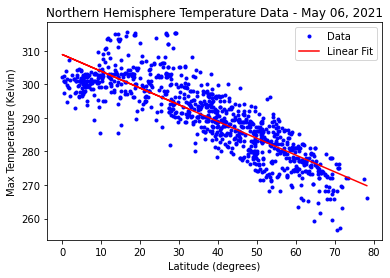

R-squared: 0.717394
slope (95%): -0.500103 +/- 0.020092


In [95]:
clean_city_north = clean_city_data[clean_city_data['Latitude']>0.0]
clean_city_north.info()

linear_plot(clean_city_north['Latitude'],clean_city_north['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Northern Hemisphere Temperature Data - %s')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

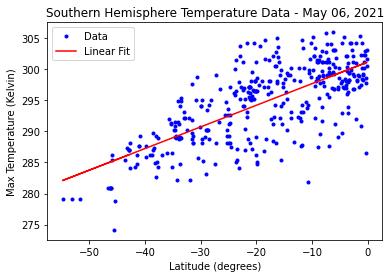

R-squared: 0.512837
slope (95%): 0.347911 +/- 0.034339


In [96]:
clean_city_south = clean_city_data[clean_city_data['Latitude']<0.0]

linear_plot(clean_city_south['Latitude'],clean_city_south['Max Temp'],'Latitude (degrees)','Max Temperature (Kelvin)','Southern Hemisphere Temperature Data - %s')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

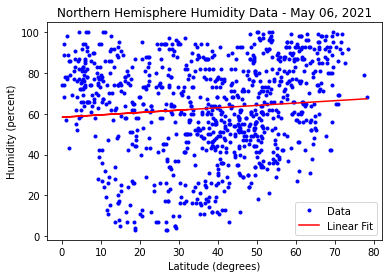

R-squared: 0.008687
slope (95%): 0.115783 +/- 0.079169


In [97]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Humidity'],'Latitude (degrees)','Humidity (percent)','Northern Hemisphere Humidity Data - %s')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

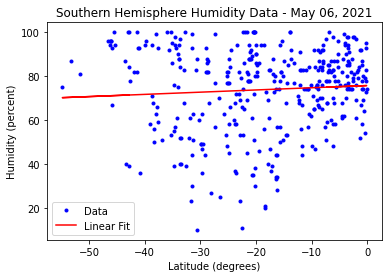

R-squared: 0.004604
slope (95%): 0.100775 +/- 0.150060


In [98]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Humidity'],'Latitude (degrees)','Humidity (percent)','Southern Hemisphere Humidity Data - %s')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

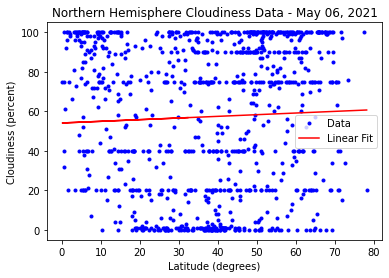

R-squared: 0.001812
slope (95%): 0.083847 +/- 0.125956


In [99]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Northern Hemisphere Cloudiness Data - %s')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

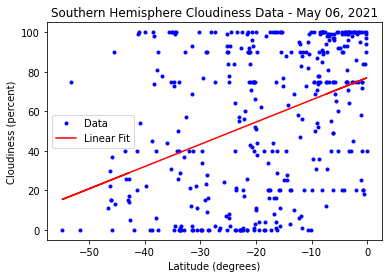

R-squared: 0.149981
slope (95%): 1.124592 +/- 0.271122


In [100]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Cloudiness'],'Latitude (degrees)','Cloudiness (percent)','Southern Hemisphere Cloudiness Data - %s')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

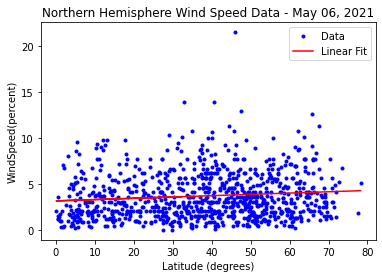

R-squared: 0.011769
slope (95%): 0.014105 +/- 0.008274


In [101]:
linear_plot(clean_city_north['Latitude'],clean_city_north['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Northern Hemisphere Wind Speed Data - %s')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

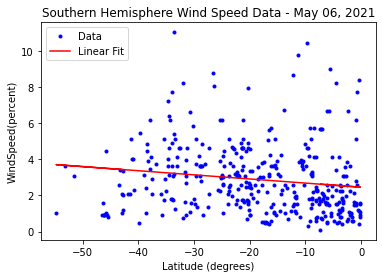

R-squared: 0.023732
slope (95%): -0.022776 +/- 0.014794


In [102]:
linear_plot(clean_city_south['Latitude'],clean_city_south['Wind Speed'],'Latitude (degrees)','WindSpeed(percent)','Southern Hemisphere Wind Speed Data - %s')

### A Proper Analysis of the Temperature vs. Latitude Data

#### Now, let's do the fit of temperature vs. latitude correctly!!! ####

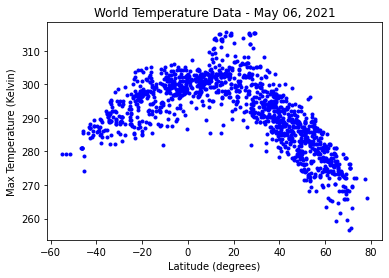

In [103]:
plt.plot(clean_city_data['Latitude'],clean_city_data['Max Temp'],'b.')
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % today)
plt.savefig('World_Temperature.png')
plt.show()

Coefficients (from curve_fit)
[ 3.00841370e+02  2.40730613e-01 -8.55085094e-03 -2.04173964e-04
  1.48843239e-06  4.98485655e-08 -4.58345293e-10]
Covariance Matrix (from curve_fit)
[[ 8.08391800e-02 -1.73689650e-04 -1.45571951e-04  8.74058307e-07
   5.48120024e-08 -4.07568088e-10 -2.48206661e-12]
 [-1.73689650e-04  4.76665236e-04 -2.83531299e-06 -6.09969887e-07
   5.80430499e-09  1.69419135e-10 -1.98607306e-12]
 [-1.45571951e-04 -2.83531299e-06  5.18499736e-07  5.04822432e-10
  -2.65827774e-10  7.81725096e-13  2.33722637e-14]
 [ 8.74058307e-07 -6.09969887e-07  5.04822432e-10  9.71391637e-10
  -7.88927342e-12 -3.04882115e-13  3.46254904e-15]
 [ 5.48120024e-08  5.80430499e-09 -2.65827774e-10 -7.88927342e-12
   2.13029685e-13  1.96955785e-15 -4.18853434e-17]
 [-4.07568088e-10  1.69419135e-10  7.81725096e-13 -3.04882115e-13
   1.96955785e-15  1.05988623e-16 -1.15590432e-18]
 [-2.48206661e-12 -1.98607306e-12  2.33722637e-14  3.46254904e-15
  -4.18853434e-17 -1.15590432e-18  1.52912269e-20]]


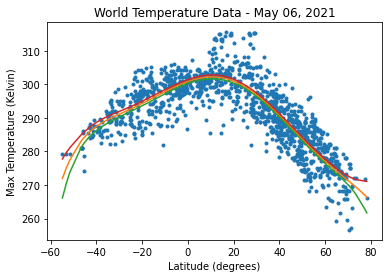

In [104]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    #return paramlist[2]-paramlist[0]*(np.sin(np.pi/180.0*(x-paramlist[1])))**2
    return paramlist[0]+paramlist[1]*x+paramlist[2]*x**2+ \
        paramlist[3]*x**3+paramlist[4]*x**4+paramlist[5]*x**5+paramlist[6]*x**6

#init_vals = [35.0,3.0,300.0]
init_vals = [300,3.0,.3,.03,0.003,0.0003,.00003]

clean_city_data = clean_city_data.sort_values(by=['Latitude'])

xi = clean_city_data['Latitude']
yi = clean_city_data['Max Temp']

popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
#print ("Final Result: y = (%0.2f +/- %0.2f)  - (%0.2f +/- %0.2f)*sin^2(Pi/180(x - (%0.2f +/- %0.2f)) " 
#       % (popt[2],perr[2],popt[0],perr[0],popt[1],perr[1]))

residuals = yi - fitfunction(xi, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((yi-np.mean(yi))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared:.6f}")

plt.plot(xi,yi,'.')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.xlabel('Latitude (degrees)')
plt.ylabel('Max Temperature (Kelvin)')
plt.title('World Temperature Data - %s' % today)
plt.show()

In [105]:
# What might we expect?
#
# The earth's rotational axis is perpendicular to the earth-sun axis on the spring and fall equinoxes 
# (March 21 and September 21).  On these dates the sun is directly over the equator.  
# The rotational axis is parallel to the earth-sun axes on the summer and winter solstaces 
# (June 21 and December 21).  On these dates, the sun is directly over the Tropics of Cancer 
# and Capricorn, respectively.  The tilt of the earth's axis is 23.5 degrees.  Today is May 6th.  
# It has been 46 days since the spring equinox.  Therefore, the sun is directly over the latitude 
# corresponding to:  (46/(0.25*365))*23.5 = 11.8 degrees.

flag = True
for i in range(1000):
    theta = -10.0+i/999.0*30.0
    fprime = popt[1]+2.0*popt[2]*theta+3.0*popt[3]*theta**2+ \
        4.0*popt[4]*theta**3+5.0*popt[5]*theta**4+6.0*popt[6]*theta**5
    if (fprime<0.0 and flag):
        print ("Maximum at theta = %0.2f degrees" % theta)
        flag = False

Maximum at theta = 10.63 degrees
